In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [293]:
df = pd.read_csv("/content/drive/MyDrive/ECGR 4105 -Intro to Machine Learning/Homework/D3.csv")
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

100

In [294]:
x1 = df.values[:, 0]  #input values from 1st column
x2 = df.values[:, 1]  #input values from 2nd column
x3 = df.values[:, 2]  #input values from 3rd column
y  = df.values[:, 3]   #output values from 4th column
m  = len(y) # Number of training examples

x1

In [295]:
X = x1
print('X = ', X[: 5]) # Show only first 5 records
print('y = ', y[: 5]) # Show only first 5 records
print(' ')
print('X = ', X[: 100]) # Show 100 records
print('y = ', y[: 100]) # Show 100 records
print('m = ', m)

X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
 
X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525252 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454546 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.5050505  2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111


Text(0.5, 1.0, 'Scatter plot of training data')

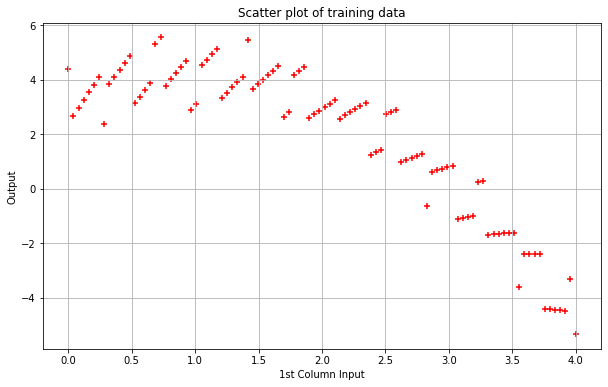

In [296]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('1st Column Input')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

In [297]:
#A matrix with single column of ones
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [298]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [299]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [300]:
theta = np.zeros(2)
theta

array([0., 0.])

In [301]:
def compute_loss(X, y, theta):
  """
  Compute loss for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [302]:
# Lets compute the loss for theta values
loss = compute_loss(X, y, theta)
print('The loss for given values of theta_0 and theta_1 =', loss)

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [303]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute loss for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  loss_history: Conatins value of loss for each iteration. 1D array. Dimansion(m x 1)
  """
  loss_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(X, y, theta)

  return theta, loss_history

In [304]:
theta = [0., 0.]
iterations = 500;
alpha = 0.05;

In [305]:
theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 5.90572164 -2.02968566]
loss_history = [5.32852962 5.18676104 5.07204859 4.97135951 4.87841102 4.7901631
 4.70513385 4.6225903  4.54215964 4.46364257 4.38692354 4.31192769
 4.23860012 4.16689592 4.09677542 4.02820186 3.96114022 3.89555678
 3.83141873 3.76869415 3.70735181 3.64736126 3.58869268 3.53131694
 3.47520555 3.42033064 3.36666497 3.31418189 3.26285534 3.21265983
 3.16357044 3.1155628  3.06861307 3.02269793 2.97779459 2.93388074
 2.8909346  2.84893482 2.80786057 2.76769143 2.72840747 2.68998918
 2.65241749 2.61567373 2.57973967 2.54459746 2.51022965 2.47661918
 2.44374936 2.41160386 2.38016673 2.34942236 2.31935548 2.28995115
 2.26119479 2.23307211 2.20556915 2.17867225 2.15236805 2.1266435
 2.10148583 2.07688253 2.0528214  2.02929048 2.0062781  1.98377283
 1.96176348 1.94023914 1.91918911 1.89860295 1.87847043 1.85878155
 1.83952654 1.82069584 1.8022801  1.78427017 1.76665712 1.74943218
 1.73258682 1.71611267 1.70000155 1.68424546 1.66883657 1.65376723


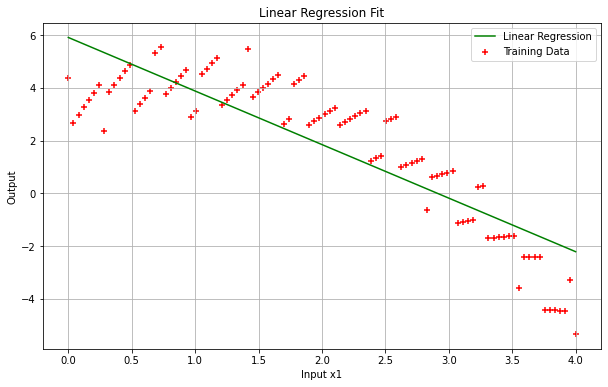

In [306]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input x1')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

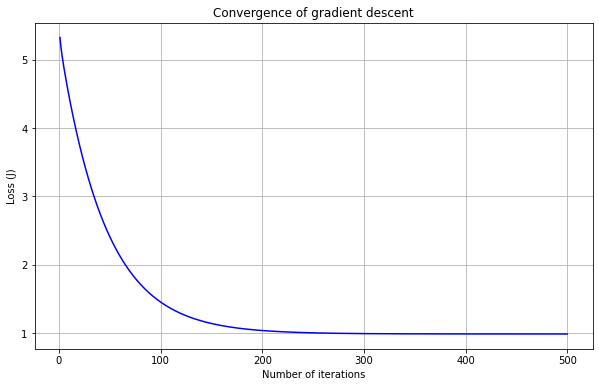

In [307]:
plt.plot(range(1, iterations + 1),loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

x2

In [308]:
X = x2
print('X = ', X[: 5]) # Show only first 5 records
print('y = ', y[: 5]) # Show only first 5 records
print(' ')
print('X = ', X[: 100]) # Show 100 records
print('y = ', y[: 100]) # Show 100 records
print('m = ', m)

X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
 
X =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798 2.91474747
 3.60969697 0.30464646 0.99959596 1.69454546 2.38949495 3.08444444
 3.77939394 0.47434343 1.16929293 1.86424242 2.55919192 3.25414141
 3.94909091 0.6440404  1.3389899  2.03393939 2.72888889 3.42383838
 0.11878788 0.81373737 1.50868687 2.20363636 2.89858586 3.59353535
 0.28848485 0.98343434 1.67838384 2.37333333 3.06828283 3.76323232
 0.45818182 1.15313131 1.84808081 2.5430303  3.2379798  3.93292929
 0.62787879 1.32282828 2.01777778 2.71272727 3.40767677 0.10262626
 0.79757576 1.49252525 2.18747475 2.88242424 3.57737374 0.27232323
 0.96727273 1.66222222 2.35717172 3.05212121 3.74707071 0.4420202
 1.1369697  1.83191919 2.52686869 3.22181818 3.91676768 0.61171717
 1.30666667 2.00161616 2.69656566 3.39151515 0.08646465 0.78141414
 1.47636364 2.17131313 2.86626263 3.56121212 0.25616162 0.95111111

Text(0.5, 1.0, 'Scatter plot of training data')

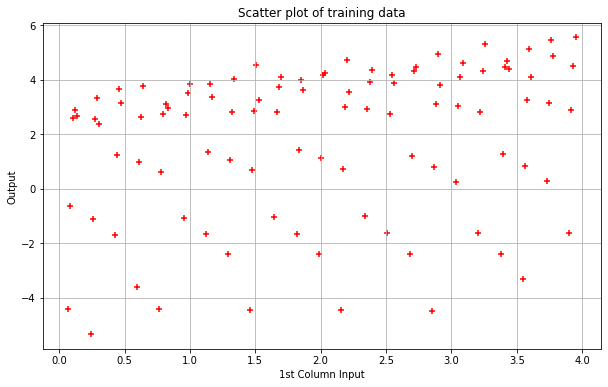

In [309]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('1st Column Input')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

In [310]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:10]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [311]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [312]:
def compute_loss(X, y, theta):
  """
  Compute loss for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [313]:
# Lets compute the loss for theta values
loss = compute_loss(X, y, theta)
print('The loss for given values of theta_0 and theta_1 =', loss)

The loss for given values of theta_0 and theta_1 = 8.152042142541548


In [314]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute loss for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  loss_history: Conatins value of loss for each iteration. 1D array. Dimansion(m x 1)
  """
  loss_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(X, y, theta)

  return theta, loss_history

In [315]:
theta = [0., 0.]
iterations = 500;
alpha = 0.09;

In [316]:
theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [0.73604139 0.55761502]
loss_history = [4.00462041 3.69945673 3.63759188 3.62448387 3.6211691  3.61984293
 3.61894118 3.61814956 3.61740412 3.6166911  3.61600683 3.61534971
 3.61471856 3.61411233 3.61353004 3.61297075 3.61243354 3.61191754
 3.61142192 3.61094587 3.61048862 3.61004942 3.60962756 3.60922237
 3.60883317 3.60845934 3.60810027 3.60775538 3.60742411 3.60710592
 3.6068003  3.60650674 3.60622478 3.60595394 3.60569381 3.60544394
 3.60520394 3.60497342 3.604752   3.60453933 3.60433505 3.60413884
 3.60395037 3.60376935 3.60359548 3.60342847 3.60326805 3.60311397
 3.60296598 3.60282383 3.60268729 3.60255614 3.60243017 3.60230918
 3.60219296 3.60208134 3.60197412 3.60187113 3.60177221 3.6016772
 3.60158594 3.60149828 3.60141408 3.60133321 3.60125553 3.60118092
 3.60110926 3.60104042 3.6009743  3.6009108  3.6008498  3.60079121
 3.60073493 3.60068088 3.60062896 3.60057909 3.60053119 3.60048518
 3.60044099 3.60039854 3.60035777 3.60031861 3.60028099 3.60024486
 

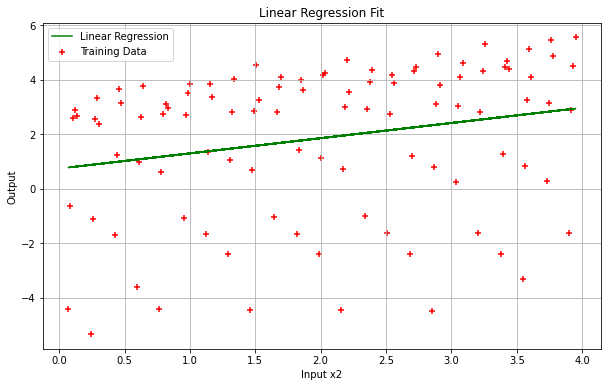

In [317]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input x2')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

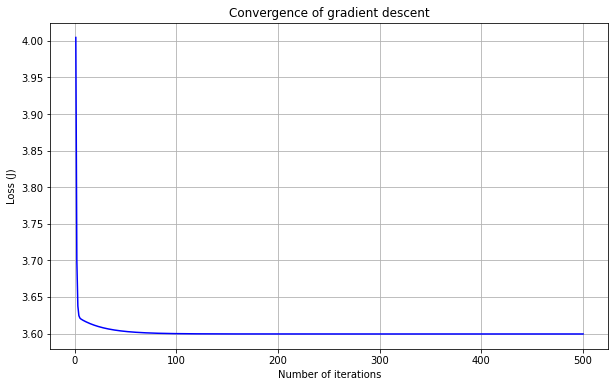

In [318]:
plt.plot(range(1, iterations + 1),loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

x3

In [319]:
X = x3
print('X = ', X[: 5]) # Show only first 5 records
print('y = ', y[: 5]) # Show only first 5 records
print(' ')
print('X = ', X[: 100]) # Show 100 records
print('y = ', y[: 100]) # Show 100 records
print('m = ', m)

X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
 
X =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939 2.68242424
 3.13090909 3.57939394 0.02787879 0.47636364 0.92484849 1.37333333
 1.82181818 2.27030303 2.71878788 3.16727273 3.61575758 0.06424242
 0.51272727 0.96121212 1.40969697 1.85818182 2.30666667 2.75515152
 3.20363636 3.65212121 0.10060606 0.54909091 0.99757576 1.44606061
 1.89454546 2.3430303  2.79151515 3.24       3.68848485 0.1369697
 0.58545455 1.03393939 1.48242424 1.93090909 2.37939394 2.82787879
 3.27636364 3.72484848 0.17333333 0.62181818 1.07030303 1.51878788
 1.96727273 2.41575758 2.86424242 3.31272727 3.76121212 0.20969697
 0.65818182 1.10666667 1.55515151 2.00363636 2.45212121 2.90060606
 3.34909091 3.79757576 0.24606061 0.69454545 1.1430303  1.59151515
 2.04       2.48848485 2.9369697  3.38545454 3.83393939 0.28242424
 0.73090909 1.17939394 1.62787879 2.07636364 2.52484849 2.97333333

Text(0.5, 1.0, 'Scatter plot of training data')

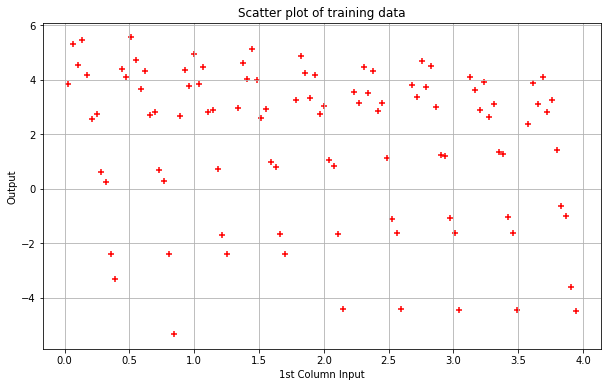

In [320]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('1st Column Input')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

In [321]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [322]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [323]:
def compute_loss(X, y, theta):
  """
  Compute loss for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [324]:
# Lets compute the loss for theta values
loss = compute_loss(X, y, theta)
print('The loss for given values of theta_0 and theta_1 =', loss)

The loss for given values of theta_0 and theta_1 = 4.4078882323373545


In [325]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute loss for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  loss_history: Conatins value of loss for each iteration. 1D array. Dimansion(m x 1)
  """
  loss_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    loss_history[i] = compute_loss(X, y, theta)

  return theta, loss_history

In [326]:
theta = [0., 0.]
iterations = 500;
alpha = 0.07;

In [327]:
theta, loss_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 2.87046629 -0.52010487]
loss_history = [4.85255415 4.60604012 4.50471506 4.45330062 4.4193854  4.39193308
 4.36717533 4.34381539 4.32139734 4.29975158 4.27880635 4.25852355
 4.23887699 4.21984493 4.20140755 4.18354606 4.16624239 4.14947911
 4.13323932 4.11750669 4.10226536 4.0875     4.07319575 4.05933819
 4.04591339 4.03290783 4.02030841 4.00810246 3.99627768 3.98482218
 3.97372441 3.96297322 3.95255777 3.94246758 3.93269249 3.92322266
 3.91404857 3.90516097 3.89655092 3.88820975 3.88012906 3.87230072
 3.86471685 3.85736982 3.85025222 3.8433569  3.8366769  3.83020552
 3.82393623 3.81786271 3.81197887 3.80627877 3.80075668 3.79540704
 3.79022445 3.78520372 3.78033977 3.77562772 3.77106282 3.76664047
 3.76235623 3.75820578 3.75418495 3.75028968 3.74651605 3.74286027
 3.73931865 3.73588763 3.73256376 3.72934369 3.72622418 3.72320209
 3.72027437 3.71743808 3.71469037 3.71202846 3.70944968 3.70695143
 3.7045312  3.70218655 3.69991512 3.69771462 3.69558284 3.6935176

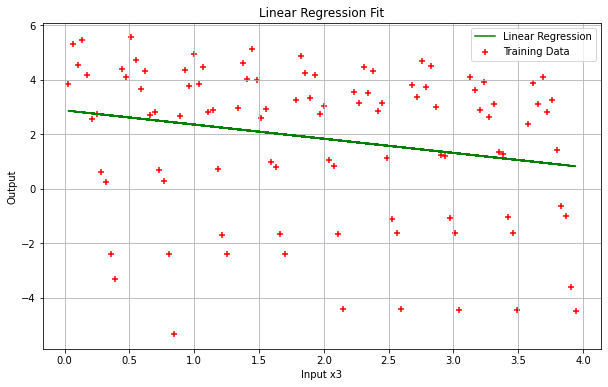

In [328]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input x3')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

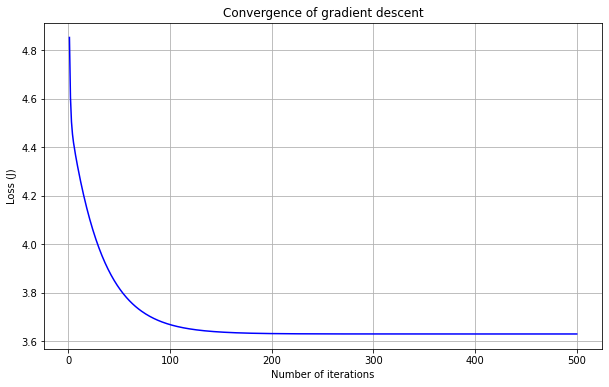

In [329]:
plt.plot(range(1, iterations + 1),loss_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 2

In [330]:
df2 = df
df2.head() # To get first n rows from the dataset default value of n is 5

df2 = pd.concat([pd.Series(1, index=df2.index, name = 'X0'), df2], axis=1)
df2.head() # To get first n rows from the dataset default value of n is 5

,X0,X1,X2,X3,Y
0,1,0.000000,3.440000,0.440000,4.387545
1,1,0.040404,0.134949,0.888485,2.679650
2,1,0.080808,0.829899,1.336970,2.968490
3,1,0.121212,1.524848,1.785455,3.254065
4,1,0.161616,2.219798,2.233939,3.536375


In [331]:
df2.shape

(100, 5)

In [332]:
newX = df2.drop(columns = 'Y')
newX.head()
newY = df2.iloc[:,4]

In [333]:
newTheta = np.array([0]*len(newX.columns))
newLoss = compute_loss(newX,newY,newTheta)
print('The loss for the given values of theta_0 & theta_1 =', newLoss)

The loss for the given values of theta_0 & theta_1 = 5.524438459196242


In [334]:
newTheta = [0., 0., 0., 0.]
newIterations = 500;
newAlpha = 0.1;

In [335]:
newTheta, newLoss = gradient_descent(newX, newY, newTheta, newAlpha, newIterations)
print('Final value of the new theta =', newTheta)
print('newLoss =', newLoss)

Final value of the new theta = X0    5.279508
X1   -1.998823
X2    0.538291
X3   -0.260522
dtype: float64
newLoss = [4.13064348 3.51770697 3.12758306 2.84173082 2.6232134  2.45337153
 2.31980849 2.21352203 2.12782089 2.05770031 1.99940853 1.95012933
 1.90774619 1.87066655 1.83769052 1.80791283 1.78064937 1.75538231
 1.7317189  1.70936057 1.68807977 1.66770254 1.64809537 1.62915539
 1.61080291 1.59297582 1.57562536 1.5587129  1.54220757 1.52608438
 1.51032287 1.49490602 1.4798195  1.46505102 1.45058989 1.43642665
 1.42255284 1.40896075 1.39564327 1.38259381 1.36980617 1.35727446
 1.3449931  1.3329567  1.32116011 1.30959833 1.29826652 1.28715998
 1.27627412 1.26560449 1.25514673 1.2448966  1.23484993 1.22500266
 1.21535081 1.20589048 1.19661787 1.18752924 1.17862092 1.16988935
 1.161331   1.15294244 1.1447203  1.13666127 1.12876211 1.12101965
 1.11343079 1.10599247 1.09870171 1.09155559 1.08455122 1.0776858
 1.07095657 1.06436083 1.05789594 1.05155929 1.04534834 1.0392606
 1.03329363 1.0

Text(0.5, 1.0, 'Convergence of Gradient Descent')

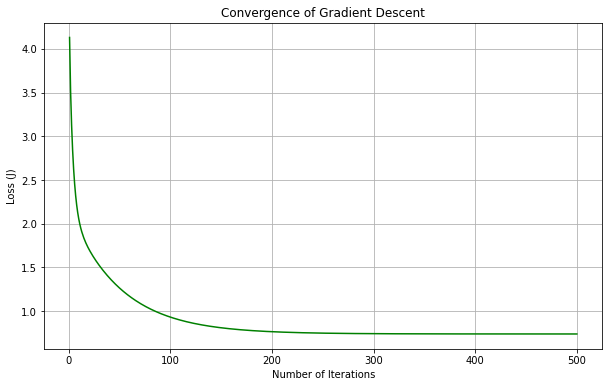

In [336]:
plt.plot(range(1,newIterations + 1), newLoss, color = 'green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of Gradient Descent')

In [337]:
data = {'newX1' : [1,2,3], 'newX2' : [1,0,2], 'newX3' : [1,4,1]}
newDF = pd.DataFrame(data)
newDF = pd.concat([pd.Series(1, index=newDF.index, name='newX0'),newDF], axis=1)
newDF.head()
newDF = newDF.to_numpy()
newTheta = newTheta.to_numpy()

In [338]:
def hypo(newTheta, newDF):
   hypo = newDF.dot(newTheta)
   return hypo

In [339]:
y_com = hypo(newTheta, newDF)
print("Predicted Value = ", y_com)

Predicted Value =  [3.5584538  0.23977565 0.09909828]
